# Lista 7 - Knapsack - Programação Dinâmica

## Solução do problema

### Funções

In [1]:
def knapSack(W, n, val, wt):
    v = [[0] * (W+1) for _ in range(n+1)]
    taken_matrix = [[False] * (W+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for w in range(1, W+1):
            not_taking = v[i-1][w]
            v[i][w] = not_taking

            if wt[i] <= w:
                taking = val[i] + v[i-1][w - wt[i]]
                
                if taking >= not_taking:
                    taken_matrix[i][w] = True
                    v[i][w] = taking    

    return taken_matrix
            
def reconstruct(taken_matrix, W, n, val, wt):
    itens = []
    for i in range(n, -1, -1):
        if taken_matrix[i][W]:
            W -= wt[i]
            itens += [i]
    return itens

### Execução e relatório

In [2]:
import random

n, W = int(random.random()*100)%10 + 10, int(random.random()*100)%40 + 10
val = [int(random.random()*100)+1 for _ in range(n+1)]
wt = [int(random.random()*100)+1 for _ in range(n+1)]

print("O máximo de peso que se pode carregar é '{}'.".format(W), end='\n\n')
print('Os itens disponíveis são:')
for item in range(1, len(val)):
    print('\t\tItem: {:2d}, Valor: {:02d}, Peso: {:02d}'.format(item, val[item], wt[item]))

taken_matrix = knapSack(W, n, val, wt)
taken_idxs = reconstruct(taken_matrix, W, n, val, wt)

taken_vals = [val[i] for i in taken_idxs]
taken_weigths = [wt[i] for i in taken_idxs]

print("\nO máximo que se pode carregar em valor é '{}' com um peso de '{}Kg', com os itens: '{}'.".format(sum(taken_vals), sum(taken_weigths), ', '.join(map(str, taken_idxs))))

O máximo de peso que se pode carregar é '22'.

Os itens disponíveis são:
		Item:  1, Valor: 89, Peso: 87
		Item:  2, Valor: 78, Peso: 64
		Item:  3, Valor: 82, Peso: 73
		Item:  4, Valor: 49, Peso: 47
		Item:  5, Valor: 01, Peso: 28
		Item:  6, Valor: 23, Peso: 18
		Item:  7, Valor: 54, Peso: 28
		Item:  8, Valor: 44, Peso: 19
		Item:  9, Valor: 07, Peso: 53
		Item: 10, Valor: 77, Peso: 01
		Item: 11, Valor: 42, Peso: 08
		Item: 12, Valor: 19, Peso: 24
		Item: 13, Valor: 13, Peso: 17
		Item: 14, Valor: 74, Peso: 87
		Item: 15, Valor: 63, Peso: 88

O máximo que se pode carregar em valor é '121' com um peso de '20Kg', com os itens: '10, 8'.


### Ilustração da solução

In [3]:
import random

knapsack_capacity = W
items_picked = taken_idxs
wt = wt

nrows, ncols = 1, knapsack_capacity
random_colors = [random.uniform(0, 10) for x in range(len(wt[1:]))]

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def update_image(image):
    row_labels = range(nrows, 0, -1)
    col_labels = range(1, ncols+1)
    
    im = plt.matshow(image, vmin=0, vmax=10, cmap='Set1', aspect='auto')
    colors = [im.cmap(im.norm(i)) for i in random_colors]
    
    plt.xticks([0.5 + i for i in range(ncols)], col_labels)
    plt.yticks([], row_labels)
    
    patches = [mpatches.Patch(color=colors[i], label="Item {:2d}, Peso {:02d}".format(i+1, j) ) for i, j in enumerate(wt[1:]) ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

In [5]:
import numpy as np

def build_knapsack(list_height_boards):
    image = np.zeros(nrows*ncols)
    image = image.reshape((nrows, ncols))
    return image

#### Bolsa vazia

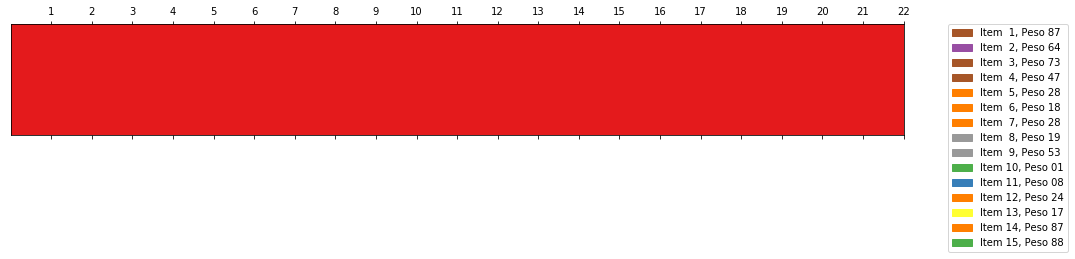

In [6]:
import numpy as np

image = build_knapsack(knapsack_capacity)
update_image(image)

In [7]:
used_capacity = 0

def execute_commands(item, img_target):
    global used_capacity

    for i in range(wt[item]):
        if used_capacity + wt[item] <= knapsack_capacity and img_target[0, i+used_capacity] < min(random_colors):
            img_target[0, i+used_capacity] = random_colors[item-1]
    used_capacity += wt[item]
    return img_target

#### Preenchimento com os itens

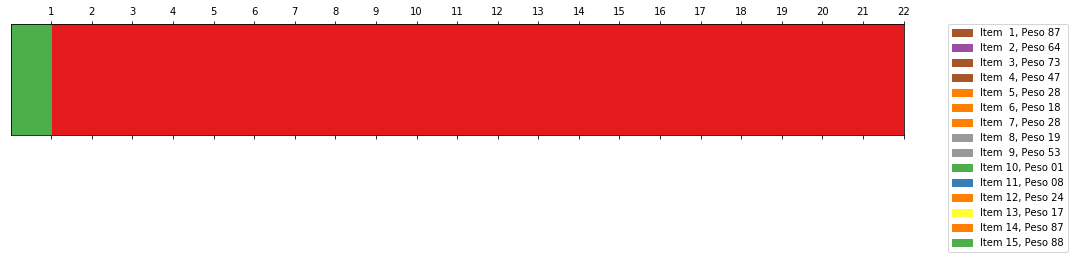

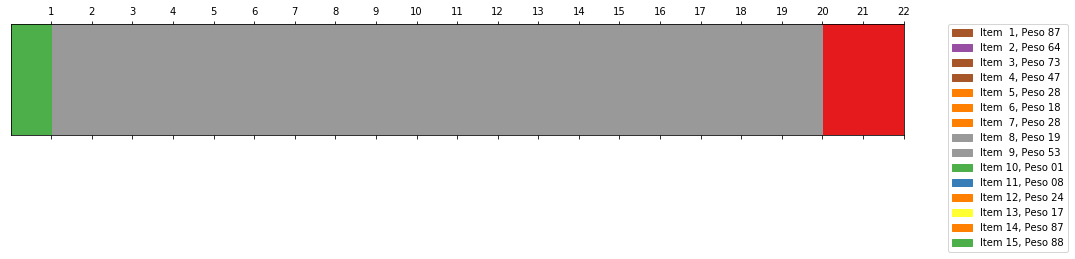

In [8]:
for i in items_picked:
    image = execute_commands(i, image)
    update_image(image)